# 정규방정식

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

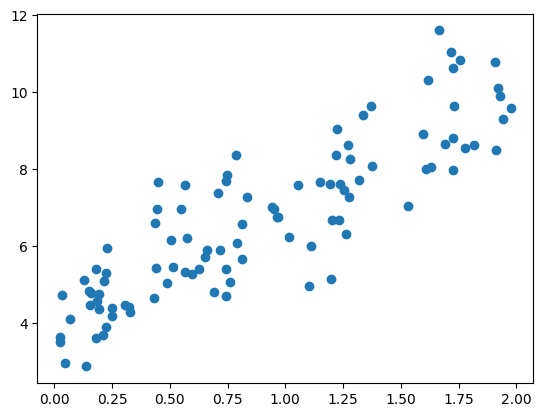

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
# linalg: 선형대수 함수 (linear algebra)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.99110657],
       [3.02807383]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99110657],
       [10.04725423]])

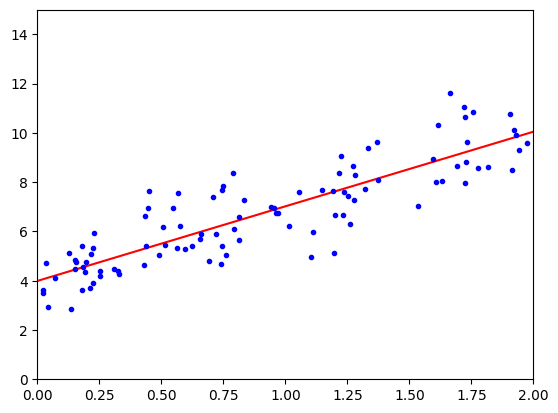

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
# intercept_ 절편, coef_ 가중치
lin_reg.intercept_, lin_reg.coef_

(array([3.99110657]), array([[3.02807383]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.99110657],
       [10.04725423]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # 최소제곱법 Least Squares Problem
theta_best_svd

# residual: 잔차 또는 오차 벡터, 실제 값과 예측 값 간의 차이
# rank: 행렬의 선형 독립된 행 또는 열의 최대 개수를 나타냄
# s: 특이값 벡터입니다. 특이값은 행렬의 특이분해(singular value decomposition, SVD)에서 나오는 중요한 값으로, 선형 회귀 문제에서 잔차의 크기를 측정하는 데 사용됩니다.

array([[3.99110657],
       [3.02807383]])

In [11]:
# 유사역 행렬 (pseudoinverse) = 무어-펜로즈 (Moore-Penrose) 역행렬
np.linalg.pinv(X_b).dot(y)

array([[3.99110657],
       [3.02807383]])

# 경사 하강법

## 배치 경사하강법 (Batch Gradient Descent)

In [12]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iter in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[3.99110657],
       [3.02807383]])

## 확률적 경사 하강법 (Stochastic Gradient Descent)

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m): # m번: 훈련 세트에 있는 샘플 수
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[3.97608297],
       [3.04499027]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

'''
max_iter: 최대 반복 횟수로, 경사 하강법을 몇 번 반복할지를 결정합니다.
tol: 반복 중 비용 함수의 변화가 이 값보다 작아지면 알고리즘이 수렴했다고 간주합니다.
penalty: 규제 항을 설정하는데, 여기서는 규제를 사용하지 않기 위해 None으로 설정되었습니다.
eta0: 학습률(learning rate)의 초기값으로, 경사 하강법 단계의 크기를 조절합니다
'''

'\nmax_iter: 최대 반복 횟수로, 경사 하강법을 몇 번 반복할지를 결정합니다.\ntol: 반복 중 비용 함수의 변화가 이 값보다 작아지면 알고리즘이 수렴했다고 간주합니다.\npenalty: 규제 항을 설정하는데, 여기서는 규제를 사용하지 않기 위해 None으로 설정되었습니다.\neta0: 학습률(learning rate)의 초기값으로, 경사 하강법 단계의 크기를 조절합니다\n'

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01056779]), array([3.04150292]))

## 미니배치 경사하강법 (mini-batch Gradient Descent)

In [18]:
n_epoch = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epoch):
    shuffled_indices = np.random.permutation(m) # 0부터 m-1까지의 정수를 무작위로 섞은 배열을 생성
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [19]:
theta

array([[3.940006  ],
       [2.96489325]])

# 다항 회귀

In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [22]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

# 학습 곡선

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "validation set")

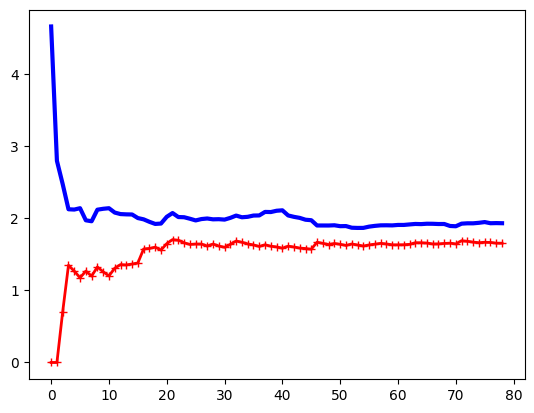

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

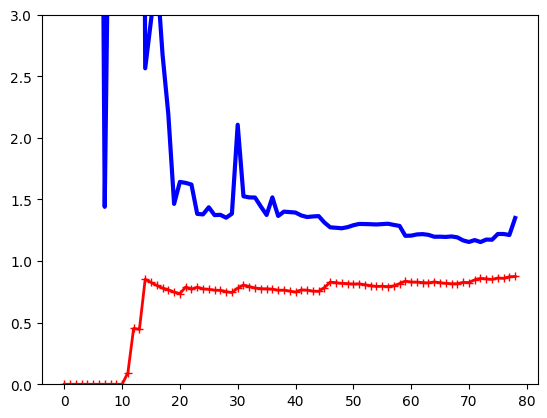

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# 규제

## Ridge 회귀

In [32]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

In [37]:
# l2 규제: 릿지 회귀
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.14335684])

## 라쏘 회귀

In [38]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09481859])

In [39]:
# l1 규제: 라쏘 회귀
sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.10303172])

## 엘라스틱넷

In [41]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

## 조기 종료

In [48]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = 1e-4, warm_start = True,
                       penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/loc

In [49]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=0.0001, warm_start=True)

In [50]:
best_epoch

238